In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_rows', 500)

In [17]:
df = pd.read_csv('property_listing.csv')
df = (df
.rename(
    columns = {
        'Car Parks' : 'Car_parks',
        'Property Type' : 'Property_type'

        }
    )
)

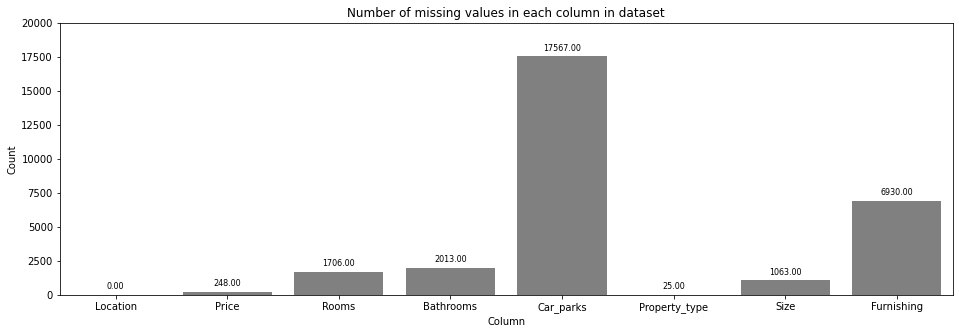

In [5]:
fig,ax = plt.subplots(1,1,figsize=(16, 5))

g = sns.barplot(
    data = df.isnull().sum().to_frame().reset_index(),
    x = 'index',
    y = 0,
    ax=ax,
    color = 'gray'
)

for val in g.patches:
    g.annotate(
        format(val.get_height(), '.2f'),
        (val.get_x() + val.get_width() / 2,
        val.get_height()), 
        ha='center', 
        va='center',
        size=8, 
        xytext=(0, 8),
        textcoords='offset points'
    )

g.set_ylim(0, 20000)
g.set_xlabel('Column')
g.set_ylabel('Count')
g.set_title('Number of missing values in each column in dataset')
plt.show()

#### Drop instances of rows with too many null values | Final data size: 50,623 rows

In [27]:
df['Missing_counts'] = df.isna().sum(axis=1)

def modify(df):
    return (df
    .assign(
        # Car_parks = df.Car_parks.fillna(0),
        Furnishing = df.Furnishing.fillna('Unknown')
    )
    .drop(
        df.query("Missing_counts > 4 or Price.isna() or Rooms.isna() or Bathrooms.isna() or Size.isna() or Property_type.isna()").index,
        )
    .drop(
        columns=['Missing_counts']
    )
    ).reset_index(drop=True)

In [28]:
modify(df)

,Location,Price,Rooms,Bathrooms,Car_parks,Property_type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
4,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
...,...,...,...,...,...,...,...,...
50618,"Bangsar, Kuala Lumpur","RM 5,100,000",5+1,4.0,NaN,Bungalow (Corner),Land area : 7168 sq. ft.,Fully Furnished
50619,"Bangsar, Kuala Lumpur","RM 5,000,000",5,4.0,NaN,Bungalow (Intermediate),Land area : 15000 sq. ft.,Unfurnished
50620,"Bangsar, Kuala Lumpur","RM 5,500,000",5+1,4.0,NaN,Bungalow (Intermediate),Land area : 7168 sq. ft.,Partly Furnished
50621,"Wangsa Maju, Kuala Lumpur","RM 480,000",3,2.0,NaN,Condominium (Intermediate),"Built-up : 1,150 sq. ft.",Unfurnished


### Reformatting data

In [33]:
df_dropna = modify(df)

def get_construction_size(x):
    to_replace = {
        ',' : '',
        'sq. ft.': '',
        'x' : '*',
        'X' : '*'
    }
    
    for a, b in to_replace.items():
        x = x.replace(a, b)

    return x

modified_df = (df_dropna
.assign(
    Price = df_dropna.Price.apply(lambda x: int((x.replace('RM', '').replace(',', '')))),
    Construction_type = df_dropna.Size.apply(lambda x: x.split(' :')[0]),
    Construction_size = df_dropna.Size.apply(lambda x: x.split(' :')[1])
)
.astype({
    'Furnishing' : 'category',
    'Construction_type' : 'category'
})
).drop(columns=['Size'])

modified_df

,Location,Price,Rooms,Bathrooms,Car_parks,Property_type,Furnishing,Construction_type,Construction_size
0,"KLCC, Kuala Lumpur",1250000,2+1,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,"1,335 sq. ft."
1,"Damansara Heights, Kuala Lumpur",6800000,6,7.0,NaN,Bungalow,Partly Furnished,Land area,6900 sq. ft.
2,"Dutamas, Kuala Lumpur",1030000,3,4.0,2.0,Condominium (Corner),Partly Furnished,Built-up,"1,875 sq. ft."
3,"Bukit Jalil, Kuala Lumpur",900000,4+1,3.0,2.0,Condominium (Corner),Partly Furnished,Built-up,"1,513 sq. ft."
4,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,4+2,5.0,4.0,Bungalow,Partly Furnished,Land area,7200 sq. ft.
...,...,...,...,...,...,...,...,...,...
50618,"Bangsar, Kuala Lumpur",5100000,5+1,4.0,NaN,Bungalow (Corner),Fully Furnished,Land area,7168 sq. ft.
50619,"Bangsar, Kuala Lumpur",5000000,5,4.0,NaN,Bungalow (Intermediate),Unfurnished,Land area,15000 sq. ft.
50620,"Bangsar, Kuala Lumpur",5500000,5+1,4.0,NaN,Bungalow (Intermediate),Partly Furnished,Land area,7168 sq. ft.
50621,"Wangsa Maju, Kuala Lumpur",480000,3,2.0,NaN,Condominium (Intermediate),Unfurnished,Built-up,"1,150 sq. ft."


#### Addressing Construction Size inconsistencies

In [9]:
def remove_integers(x):
    return re.sub('\d', '',  x)

#Filtering out invalid rows
# rows that does not contain integer
modified_df = modified_df[~modified_df.Construction_size.apply(lambda x: not bool(re.search(r'\d', x)))] 
# rows that contains invalid measurement units (acre, hectare, meters)
modified_df = modified_df[~modified_df.Construction_size.apply(lambda x: 'acre' in x or 'hectare' in x or 'sq. m.' in x or 'or' in x)]
# rows that contain invalid characters
modified_df = modified_df[~modified_df.Construction_size.apply(lambda x: bool(re.findall('\W', x.replace(',', '').replace('.', '').replace(' ', ''))))]

#obtain only integers and X from rows
modified_df = (modified_df
.assign(
    Construction_size = modified_df.Construction_size.apply(lambda x: ''.join(re.findall('\d|x|X', x)))
)
)

#query
# modified_df.query("Construction_size.str.contains('3000x')")

In [10]:
def calc_size(x):
    x = x.replace('xx', '*').replace('X', '*').replace('x', '*')
    try:
        return eval(x)
    except SyntaxError:
        return int(''.join(re.findall('\d', x)))

modified_df['Calc'] = modified_df.Construction_size.apply(lambda x: calc_size(str(x)))

In [14]:
modified_df.sort_values(by='Calc', ascending=True).head(500)
# modified_df.Price.describe()

,Location,Price,Rooms,Bathrooms,Car_parks,Property_type,Furnishing,Construction_type,Construction_size,Calc
49974,"Desa ParkCity, Kuala Lumpur",1600000,3+1,3.0,1.0,3-sty Terrace/Link House (Intermediate),Partly Furnished,Land area,0,0
13494,"KLCC, Kuala Lumpur",7500000,4+1,6.0,10.0,Condominium (Corner),Partly Furnished,Land area,0,0
14230,"City Centre, Kuala Lumpur",4000000,3+1,4.0,4.0,Condominium (Corner),Partly Furnished,Land area,0,0
38837,"Mont Kiara, Kuala Lumpur",909000,2,2.0,1.0,Condominium,Partly Furnished,Land area,0,0
14224,"Bangsar, Kuala Lumpur",6843000,3+1,4.0,3.0,Condominium (Corner),Partly Furnished,Land area,0,0
22290,"Kepong, Kuala Lumpur",448000,3,2.0,2.0,Condominium (Corner),Unknown,Land area,0,0
34495,"Taman Desa, Kuala Lumpur",570000,2,2.0,1.0,Condominium (Intermediate),Fully Furnished,Land area,0,0
36474,"Damansara Heights, Kuala Lumpur",2000000,4+1,5.0,NaN,Serviced Residence (Intermediate),Fully Furnished,Land area,0,0
38753,"Mont Kiara, Kuala Lumpur",849000,3,2.0,1.0,Condominium,Fully Furnished,Land area,0,0
31247,"Ampang, Kuala Lumpur",1390000,4+1,4.0,4.0,Condominium (Duplex),Fully Furnished,Land area,0,0


In [13]:
# modified_df.Property_type.unique()
# modified_df.Construction_size.unique()
# modified_df.Rooms.unique()